## Entrada de dados

In [91]:
import pandas as pd
import numpy as np

dados_brutos = pd.read_csv('data\dados_originais\precos-semestrais-ca-2022-01.csv', sep=';')
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529424 entries, 0 to 529423
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     529424 non-null  object 
 1   Estado - Sigla     529424 non-null  object 
 2   Municipio          529424 non-null  object 
 3   Revenda            529424 non-null  object 
 4   CNPJ da Revenda    529424 non-null  object 
 5   Nome da Rua        529424 non-null  object 
 6   Numero Rua         529211 non-null  object 
 7   Complemento        113936 non-null  object 
 8   Bairro             527991 non-null  object 
 9   Cep                529424 non-null  object 
 10  Produto            529424 non-null  object 
 11  Data da Coleta     529424 non-null  object 
 12  Valor de Venda     529424 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  529424 non-null  object 
 15  Bandeira           529424 non-null  object 
dtypes:

In [92]:
#modificacao do nome de columas
dados_brutos.columns = dados_brutos.columns.str.replace('-','')
dados_brutos.columns = dados_brutos.columns.str.replace(' ','_')
dados_brutos.columns = dados_brutos.columns.str.lower()
dados_brutos.head()

,regiao__sigla,estado__sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,valor_de_compra,unidade_de_medida,bandeira
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,03/01/2022,"6,99",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,03/01/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,03/01/2022,"6,09",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,03/01/2022,"7,05",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL S10,03/01/2022,"6,12",NaN,R$ / litro,VIBRA ENERGIA


## Inicio da limpeza 

In [94]:
#modificando o formatos dos dados 'Data da Coletas'
dados_brutos['data_da_coleta'] = pd.to_datetime(dados_brutos['data_da_coleta'], dayfirst=True)
dados_brutos['data_da_coleta'].head()

0   2022-01-03
1   2022-01-03
2   2022-01-03
3   2022-01-03
4   2022-01-03
Name: data_da_coleta, dtype: datetime64[ns]

In [77]:
datas_selecionadas = dados_brutos['Data_da_Coleta'] > '2022-04-29'
dados_brutos = dados_brutos[datas_selecionadas]


dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194404 entries, 335020 to 529423
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao_-_Sigla     194404 non-null  object        
 1   Estado_-_Sigla     194404 non-null  object        
 2   Municipio          194404 non-null  object        
 3   Revenda            194404 non-null  object        
 4   CNPJ_da_Revenda    194404 non-null  object        
 5   Nome_da_Rua        194404 non-null  object        
 6   Numero_Rua         194313 non-null  object        
 7   Complemento        42721 non-null   object        
 8   Bairro             193842 non-null  object        
 9   Cep                194404 non-null  object        
 10  Produto            194404 non-null  object        
 11  Data_da_Coleta     194404 non-null  datetime64[ns]
 12  Valor_de_Venda     194404 non-null  object        
 13  Valor_de_Compra    0 non-null       flo

In [95]:
# verificando se a valores na coluna 'Valor de Compra'
dados_brutos['valor_de_compra'].unique()

array([nan])

In [96]:
dados_brutos.drop(columns=['complemento','valor_de_compra'], inplace=True)
# Coluna 'Valor de Compra' deletadas

In [80]:
dados_brutos['Valor_de_Venda'].info()

<class 'pandas.core.series.Series'>
Int64Index: 194404 entries, 335020 to 529423
Series name: Valor_de_Venda
Non-Null Count   Dtype 
--------------   ----- 
194404 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [97]:
#tocando vigula por ponto e nudando de string para float
valores_virgula = dados_brutos['valor_de_venda'].tolist()
valores_ponto = [x.replace(',', '.') for x in valores_virgula]
dados_brutos['valor_de_venda'] = valores_ponto
dados_brutos['valor_de_venda'] = dados_brutos['valor_de_venda'].astype(float)
dados_brutos['valor_de_venda'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 529424 entries, 0 to 529423
Series name: valor_de_venda
Non-Null Count   Dtype  
--------------   -----  
529424 non-null  float64
dtypes: float64(1)
memory usage: 4.0 MB


<AxesSubplot:ylabel='Frequency'>

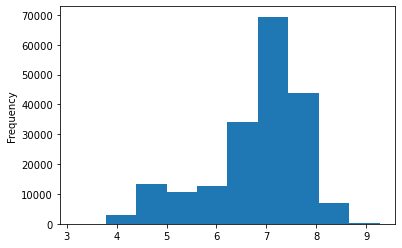

In [82]:
dados_brutos['valor_de_venda'].plot(kind='hist')

In [98]:
dados_brutos['valor_de_venda'].min()

3.17

In [105]:
#verificando baixo preço encontrado
selecao_menor = dados_brutos['valor_de_venda'] <= 4  
dados_brutos[selecao_menor].produto.unique()

array(['GNV', 'ETANOL'], dtype=object)

In [106]:
dados_brutos.query('valor_de_venda < 4')

,regiao__sigla,estado__sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
82,NE,BA,SALVADOR,POSTO KALILANDIA LTDA,15.151.046/0012-31,AVENIDA LUIS VIANA,2489,PERNAMBUES,41130-530,GNV,2022-01-03,3.99,R$ / m³,RAIZEN
94,NE,BA,SALVADOR,GAS ON LINE - COMÉRCIO E SERVIÇOS LTDA.,05.033.611/0001-50,AVENIDA HEITOR DIAS DA SILVA,735,PAU MIÚDO,40315-518,GNV,2022-01-03,3.99,R$ / m³,IPIRANGA
505,NE,PE,GOIANA,VIEIRA & RABELO LTDA,05.822.300/0001-70,"RODOVIA ROD MARGEM DA PE 75, KM 01",S/N,CENTRO,55900-000,GNV,2022-01-03,3.98,R$ / m³,BRANCA
510,NE,PE,GOIANA,BANDEIRANTE GAS LTDA,05.220.548/0001-60,RODOVIA PE 75,S/N,CENTRO,55900-000,GNV,2022-01-03,3.98,R$ / m³,VIBRA ENERGIA
1729,NE,PE,IGARASSU,CEMOPEL CM PETROLEO LTDA,69.943.686/0004-01,AVENIDA BARAO VERA CRUZ,975,CRUZ DE REBOUCAS,53610-296,GNV,2022-01-03,3.95,R$ / m³,RAIZEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529290,CO,MT,VARZEA GRANDE,VIT COMERCIO DE COMBUSTIVEIS LTDA,33.577.555/0001-50,AVENIDA ALZIRA SANTANA (LOT JD CRISTINA),1130,CENTRO-SUL,78135-686,ETANOL,2022-06-30,3.89,R$ / litro,BRANCA
529304,CO,MT,CUIABA,AJA POSTO DE COMBUSTIVEIS E DERIVADOS EIRELI,26.272.713/0001-06,AVENIDA PRESIDENTE JOAQUIM AUGUSTO DA COSTA MA...,935,QUILOMBO,78045-175,ETANOL,2022-06-30,3.95,R$ / litro,BRANCA
529375,SE,SP,LEME,AUTO POSTO CRISTAL LEME LTDA,73.028.953/0006-46,RUA RAFAEL DE BARROS,1462,CENTRO,13610-200,ETANOL,2022-06-30,3.99,R$ / litro,BRANCA
529403,SE,SP,JABOTICABAL,RENATA DE PAULA RODRIGUES DE CAMPOS EIRELI,37.264.031/0001-60,AVENIDA TIRADENTES,110,CENTRO,14870-020,ETANOL,2022-06-30,3.85,R$ / litro,BRANCA


In [116]:
dados_brutos.to_csv('data\dados_limpos\dados.csv', sep=',', index=False)

In [115]:
# verificando o arquivo gerado 
dados_b = pd.read_csv('data\dados_limpos\dados.csv')
dados_b.groupby("municipio").head()


,regiao__sigla,estado__sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,GASOLINA,2022-01-03,6.99,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,ETANOL,2022-01-03,5.99,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,DIESEL,2022-01-03,6.09,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,GASOLINA ADITIVADA,2022-01-03,7.05,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,AREAL,69906-119,DIESEL S10,2022-01-03,6.12,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461477,SE,RJ,MAGE,VIVAS & NEWMANN LTDA,05.058.162/0001-02,RUA PIO XII,486,FIGUEIRA,25900-000,GASOLINA,2022-06-09,7.89,R$ / litro,BRANCA
461478,SE,RJ,MAGE,VIVAS & NEWMANN LTDA,05.058.162/0001-02,RUA PIO XII,486,FIGUEIRA,25900-000,ETANOL,2022-06-09,6.29,R$ / litro,BRANCA
461479,SE,RJ,MAGE,VIVAS & NEWMANN LTDA,05.058.162/0001-02,RUA PIO XII,486,FIGUEIRA,25900-000,DIESEL S10,2022-06-09,6.98,R$ / litro,BRANCA
461480,SE,RJ,MAGE,VIVAS & NEWMANN LTDA,05.058.162/0001-02,RUA PIO XII,486,FIGUEIRA,25900-000,GASOLINA ADITIVADA,2022-06-09,7.99,R$ / litro,BRANCA
